# Vanilla Neural Network

This is a simple implementation of a neural network from scratch. The NN is trained on the MINST dataset ([link](https://www.kaggle.com/competitions/digit-recognizer)) using pandas and numpy. Backpropagation algorithm is used and the weights are updated using the gradient descent algorithm. The error function considered is MSE(Mean Squared Error). The model is then evaluated on the test set and the mean squared error is calculated.

\begin{align*}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}

where $y_i$ is the actual value and $\hat{y}_i$ is the predicted value.

An advantage of MSE is that it is differentiable and convex, which makes it easier to find the global minimum.

The network consists of one input layer with 768 neurons, any number of hidden layers set by the user, and one output layer with 10 neurons.

The activation function used is the sigmoid function, along with its derivative:

\begin{align*}
\sigma(x) &= \frac{1}{1 + e^{-x}} \\
\sigma'(x) &= \sigma(x)(1 - \sigma(x))
\end{align*}

## Backpropagation Algorithm

The backpropagation algorithm is used to calculate the gradients of the error function with respect to the weights. The algorithm consists of two main steps:
1. Forward pass: Calculate the output of the network given the input.
2. Backward pass: Calculate the gradients of the error function with respect to the weights and biases using the chain rule.

The gradients are then used to update the weights using the stochastic gradient descent algorithm.

### Mathematical Formulation of Backpropagation Algorithm

Let's consider a neural network with $L = 1, 2, \dots l - 1, l$ layers. We will use the following notation:

- $w_{jk}^{(l)}$ is the weight connecting the $k^{th}$ neuron in layer $l - 1$ to the $j^{th}$ neuron in layer $l$.

- $b_j^{(l)}$ is the bias of the $j^{th}$ neuron in layer $l$.

- $z_j^{(l)}$ is the weighted input to the $j^{th}$ neuron in layer $l$.

- $a_j^{(l)}$ is the activation of the $j^{th}$ neuron in layer $l$.

- $\sigma(x)$ is the sigmoid activation function.

We can represent the equations of the network in two forms: element-wise and vectorized. In the element-wise form, the activation of the $j^{th}$ neuron in layer $l$ is given by:

\begin{align*}
z_j^{(l)} &= \sum_{k=1}^{n^{(l-1)}} w_{jk}^{(l)} a_k^{(l-1)} + b_j^{(l)} \\
a_j^{(l)} &= \sigma(z_j^{(l)})
\end{align*}

Now, we can denote $w^l$ as the weight matrix connecting layer $l - 1$ to layer $l$, and $b^l$ as the bias vector of layer $l$. The equations can be written in a vectorized form as:

\begin{align*}
z^{l} &= w^{l} a^{l-1} + b^{l} \\
a^{l} &= \sigma(z^{l})
\end{align*}

The error function is given by:

\begin{align*}
C(y, \hat{y}) = \frac{1}{2n} \sum_{x}^{} (y_x - \hat{y}_x)^2
\end{align*}

where $y_x$ is the actual output and $\hat{y}_x$ is the predicted output for an instance x.

The cost function can be written as the sum of the cost for each instance:

\begin{align*}
C &= \frac{1}{n} \sum_{x}^{} C_x \\
C_x &= \frac{1}{2} \sum_{j}^{n^{(l)}} (y_j - a_j^{(L)})^2
\end{align*}

This assumption let's us easily calculate $\dfrac{\partial C_x}{\partial w}$ and $\dfrac{\partial C_x}{\partial b}$ for a single instance and then recover $\dfrac{\partial C}{\partial w}$ and $\dfrac{\partial C}{\partial b}$ by averaging over all instances.

We introduce the error $\delta_j^{(l)}$ of the $j^{th}$ neuron in layer $l$ as:

\begin{align*}
\delta_j^{(l)} = \frac{\partial C}{\partial z_j^{(l)}}
\end{align*}

This will give us a procedure to calculate the gradients of the cost function with respect to the weights and biases. The error $\delta_j^{(l)}$ can be calculated using the chain rule:

\begin{align*}
\delta^{(L)} &= \frac{\partial C}{\partial z_j^{(l)}} \\
\delta^{(l)} &= \frac{\partial C}{\partial a_j^{(l)}} \cdot \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}} \\
\end{align*}

The last term, $\frac{\partial a_j^{(l)}}{\partial z_j^{(l)}}$ is the derivative of the activation function, which is $\sigma'(z_j^{(l)})$ for the sigmoid function. So, the error $\delta_j^{(l)}$ can be written as:

\begin{align*}
\delta_j^{(l)} = \frac{\partial C}{\partial a_j^{(l)}} \cdot \sigma'(z_j^{(l)})
\end{align*}

Matrix form of the error $\delta^{(l)}$:

\begin{align*}
\delta^{(l)} = \nabla_a C \odot \sigma'(z^{(l)})
\end{align*}, 

where $\nabla_a C$ is a vector whose components are the partial derivatives $\dfrac{\partial C}{\partial a_{j}^{(l)}}$ and $\odot$ denotes the element-wise product.

The $\delta^{L}$ for the output layer $L$ is given by:

\begin{align*}
\delta^{(L)} = (a^{(L)} - y) \odot \sigma'(z^{(L)})
\end{align*}

Proof:

\begin{align*}
\delta^{(L)} &= \left( \frac{\partial C}{\partial a^{(L)}} \right) \odot \sigma'(z^{(L)}) \\
&= \frac{\partial C}{\partial a^{(L)}} \left( \frac{1}{2} \sum_{j} (y_j - a_j^{(L)})^2 \right) \odot \sigma'(z^{(L)}) \\
&= \left( a^{(L)} - y \right) \odot \sigma'(z^{(L)})
\end{align*}

An equation of the error $\delta^{(l)}$ for the hidden layers can be written as:

\begin{align*}
\delta^{(l)} = \left( (w^{(l+1)})^T \delta^{(l+1)} \right) \odot \sigma'(z^{(l)})
\end{align*},

where $(w^{(l+1)})^T$ is the transpose of the weight matrix connecting layer $l$ to layer $l+1$.

Proof using the chain rule for the error $\delta^{(l)}$:

We need to rewrite the error $\delta^{(l)}$ in terms of the error $\delta_{k}^{(l+1)} = \dfrac{\partial C}{\partial z_{k}^{l + 1}}$:

\begin{align*}
\delta^{(l)} &= \frac{\partial C}{\partial z^{(l)}} \\
&= \sum_{k} \frac{\partial C}{\partial z_{k}^{(l+1)}} \frac{\partial z_{k}^{(l+1)}}{\partial z^{(l)}} \\
&= \sum_{k} \delta_{k}^{(l+1)} \frac{\partial z_{k}^{(l+1)}}{\partial z^{(l)}} \\
&= \sum_{k} \delta_{k}^{(l+1)} \frac{\partial}{\partial z^{(l)}} \left( \sum_{j} w_{kj}^{(l+1)} a_{j}^{(l)} + b_{k}^{(l+1)} \right) \\
&= \sum_{k} \delta_{k}^{(l+1)} w_{kj}^{(l+1)} \sigma'(z_{j}^{(l)}) \\
&= \left( (w^{(l+1)})^T \delta^{(l+1)} \right) \odot \sigma'(z^{(l)})
\end{align*}

The gradients of the cost function with respect to the weights and biases can be calculated as:

\begin{align*}
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_{k}^{(l-1)} \delta_{j}^{(l)} \\
\frac{\partial C}{\partial b_{j}^{(l)}} &= \delta_{j}^{(l)}
\end{align*}

Proof:

\begin{align*}
\frac{\partial C}{\partial w_{jk}^{(l)}} &= \frac{\partial C}{\partial z_{j}^{(l)}} \cdot \frac{\partial z_{j}^{(l)}}{\partial w_{jk}^{(l)}} 
&= \delta_{j}^{(l)} \cdot \frac{\partial}{\partial w_{jk}^{(l)}} \left( \sum_{k} w_{jk}^{(l)} a_{k}^{(l-1)} + b_{j}^{(l)} \right)
&= \delta_{j}^{(l)} a_{k}^{(l-1)} \\

\frac{\partial C}{\partial b_{j}^{(l)}} &= \frac{\partial C}{\partial z_{j}^{(l)}} \cdot \frac{\partial z_{j}^{(l)}}{\partial b_{j}^{(l)}} 
&= \delta_{j}^{(l)} \cdot \frac{\partial}{\partial b_{j}^{(l)}} \left( \sum_{k} w_{jk}^{(l)} a_{k}^{(l-1)} + b_{j}^{(l)} \right)
&= \delta_{j}^{(l)}
\end{align*}

The weights and biases are then updated using the stochastic gradient descent algorithm:

\begin{align*}
w^{(l)} &:= w^{(l)} - \frac{\eta}{m} \sum_{i = 1}^{m} \delta^{x, (l)} \cdot \left( a^{(x_i, l - 1)} \right)^{T} \\
b^{(l)} &:= b^{(l)} - \frac{\eta}{m} \sum_{i = 1}^{m} \delta^{x, (l)}
\end{align*}

where $\eta$ is the learning rate, and $m$ is the number of training examples.


## Stochastic Gradient Descent

In this implementation, we use stochastic gradient descent to update the weights and biases. In stochastic gradient descent, the weights and biases are updated for a randomly selected sample of training examples. This helps in faster convergence and better generalization.  

Let's start the implementation by importing the necessary libraries.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

epsilon = 1e-6

Next, let's define the neural network class and the functions for forward pass, backward pass, and training the network.

In [94]:
class NN:
    def __init__(self, input_size, output_size, batch_size=64, hidden_layers=1, hidden_size=1, lr=0.01, epochs=1000):
        self.batch_size = batch_size
        self.lr = lr
        self.epochs = epochs
        self.losses = np.array([])

        self.hidden_layers = hidden_layers
        self.hidden_size = hidden_size

        for i in range(self.hidden_layers + 1):
            if i == 0:
                self.weights = [np.random.randn(self.hidden_size, input_size)]
                self.biases = [np.random.randn(self.hidden_size, 1)]
            elif i == self.hidden_layers:
                self.weights.append(np.random.randn(output_size, self.hidden_size))
                self.biases.append(np.random.randn(output_size, 1))
            else:
                self.weights.append(np.random.randn(self.hidden_size, self.hidden_size))
                self.biases.append(np.random.randn(self.hidden_size, 1))


    def sigmoid(self, z, derivative=False):
        if derivative:
            return self.sigmoid(z) * (1 - self.sigmoid(z))
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)) + epsilon)
    

    def MSE(self, y, y_hat):
        n = y.shape[0]
        sum = 0
        for i in range(n):
            sum += np.sum((y[i] - y_hat[i]) ** 2)

        return sum / n
    

    def feedforward(self, x):
        a = [x]
        z = []

        for i in range(self.hidden_layers + 1):
            z.append((self.weights[i] @ a[-1]) + self.biases[i])
            a.append(self.sigmoid(z[-1]))

        return a, z
    

    def backpropagation(self, a, z, y):        
        deltas = [2 * (a[-1] - y) * self.sigmoid(z[-1], derivative=True)]

        for i in range(self.hidden_layers, 0, -1):
            deltas.append(np.dot(self.weights[i].T, deltas[-1]) * self.sigmoid(z[i - 1], derivative=True))

        deltas = deltas[::-1]
        
        delta_nabla_w = [np.dot(deltas[i], a[i].T) for i in range(self.hidden_layers + 1)]
        delta_nabla_b = deltas

        return delta_nabla_w, delta_nabla_b

    def train(self, x, y):
        for epoch in range(self.epochs + 1):
            # shuffle the x and y samples
            idx = np.random.permutation(x.shape[0])
            x_sample = x[idx]
            y_sample = y[idx]
            
            y_hats = []
            for i in range(0, x_sample.shape[0], self.batch_size):
                nabla_w = [np.zeros(w.shape) for w in self.weights]
                nabla_b = [np.zeros(b.shape) for b in self.biases]
                
                x_batch = x_sample[i:i + self.batch_size]
                y_batch = y_sample[i:i + self.batch_size]

                for j in range(x_batch.shape[0]):
                    a, z = self.feedforward(x_batch[j])
                    
                    delta_nabla_w, delta_nabla_b = self.backpropagation(a, z, y_batch[j])
                    
                    nabla_w = [w_grad + delta_w for w_grad, delta_w in zip(nabla_w, delta_nabla_w)]
                    nabla_b = [b_grad + delta_b for b_grad, delta_b in zip(nabla_b, delta_nabla_b)]
                    
                    y_hats.append(a[-1])

                # update weights and biases
                self.weights = [w - (self.lr / self.batch_size) * w_grad for w, w_grad in zip(self.weights, nabla_w)]
                self.biases = [b - (self.lr / self.batch_size) * b_grad for b, b_grad in zip(self.biases, nabla_b)]

            loss = self.MSE(y_sample, y_hats)

            self.losses = np.append(self.losses, loss)

            # stop training if loss did not improve much
            if epoch > 0 and np.abs(self.losses[-1] - self.losses[-2]) < epsilon:
                break

            if epoch % 10 == 0:
                print(f'Epoch {epoch} - Loss: {loss}')

        return self.losses[-1]

    def predict_one(self, x):
        return self.feedforward(x)[0][-1]
    

    def predict(self, x):
        y_hats = []
        for i in range(x.shape[0]):
            prediction = self.predict_one(x[i])
            prediction[np.argmax(prediction)] = 1
            prediction[prediction != 1] = 0
            y_hats.append(prediction)
        return np.array(y_hats)
    
        
    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

Now, let's read the data and preprocess it.

In [95]:
df = pd.read_csv('train.csv')
df = df.dropna()

y = df['label'].tolist()
x = df.drop('label', axis=1).values.tolist()

x = np.array([np.array(i).reshape(-1, 1) for i in x])
y = np.array([np.array([1 if i == j else 0 for j in range(10)]).reshape(-1, 1) for i in y])

We'll use $80\%$ of the data for training and $20\%$ for testing.

Finally, let's train the network and evaluate it on the test set.

In [96]:
x_threshold = int(0.8 * x.shape[0])
y_threshold = int(0.8 * y.shape[0])

x_train = x[:x_threshold]
y_train = y[:y_threshold]

x_test = x[x_threshold:]
y_test = y[y_threshold:]

nn = NN(x_train[0].shape[0], 10, lr=0.2, batch_size=128, hidden_layers=3, hidden_size=32, epochs=100)

last_loss = nn.train(x_train, y_train)

Epoch 0 - Loss: 1.0152526138279367
Epoch 10 - Loss: 0.5153094386542384
Epoch 20 - Loss: 0.3754105570013842
Epoch 30 - Loss: 0.300206699332944
Epoch 40 - Loss: 0.2762900176039757
Epoch 50 - Loss: 0.24613876639346663
Epoch 60 - Loss: 0.23980618000993725
Epoch 70 - Loss: 0.22304048726742595
Epoch 80 - Loss: 0.20453146495276878
Epoch 90 - Loss: 0.21135587571312778
Epoch 100 - Loss: 0.20352290328763983


Let's now see the accuracy of the model on the test set by calculating it and plotting the error curve.

Accuracy: 86.0%
Last loss: 0.20352290328763983


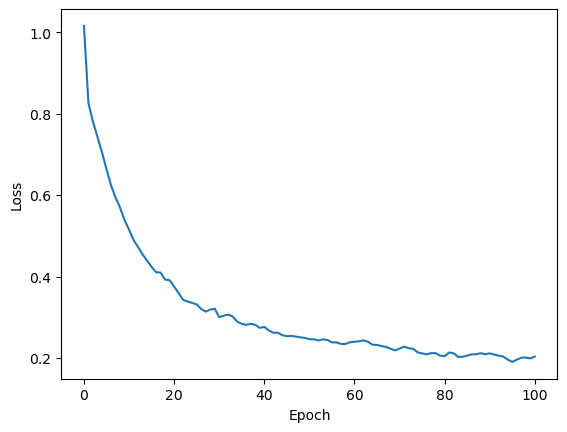

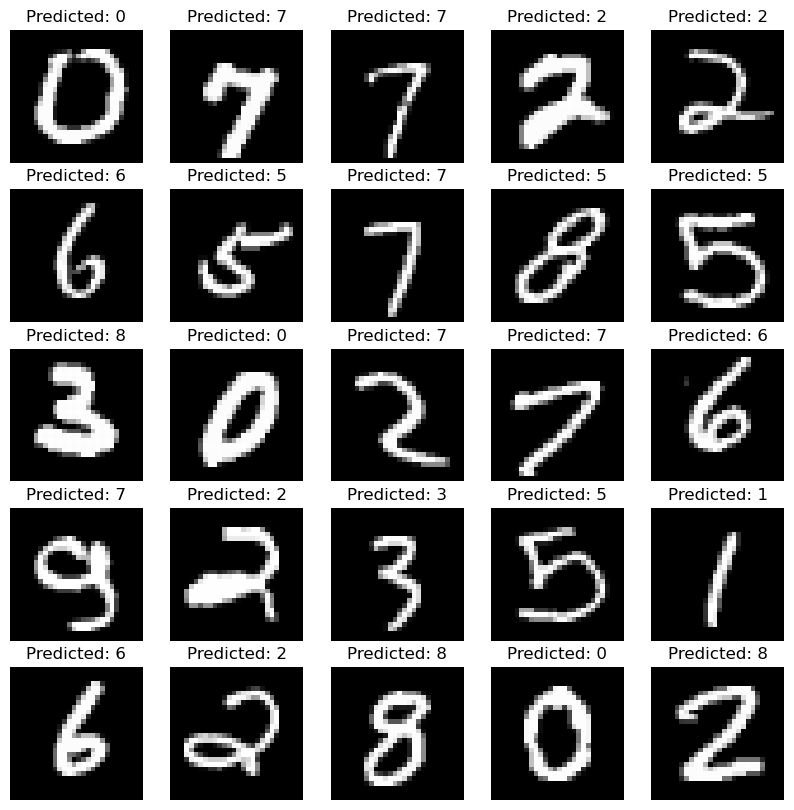

In [97]:
y_pred = nn.predict(x_test)

accuracy = np.sum([np.array_equal(y_pred[i], y_test[i]) for i in range(y_test.shape[0])]) / y_test.shape[0]

print(f'Accuracy: {round(accuracy, 2) * 100}%')

print(f'Last loss: {last_loss}')

nn.plot_loss()

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Predicted: {np.argmax(y_pred[i])}')
    ax.axis('off')
plt.show()